In [92]:
import numpy as np
from sklearn.model_selection import train_test_split

In [93]:
test_size = 0.3
x=np.load('loaded_data/ravdess_mfcc_x.npy') 
y=np.load('loaded_data/ravdess_mfcc_y.npy') 
x_train,x_test,temp_y_train,temp_y_test=train_test_split(np.array(x), y, test_size = test_size, random_state = 9)


In [94]:
x_traincnn = np.expand_dims(x_train, axis=2)
x_testcnn = np.expand_dims(x_test, axis=2)

In [95]:
x_traincnn.shape, x_testcnn.shape

((1008, 40, 1), (432, 40, 1))

In [96]:
y_test,y_train = [],[]
d={}
for i in temp_y_test:
    if i not in d:
        d[i] = len(d)
    y_test.append(d[i])
for i in temp_y_train:
    if i not in d:
        d[i] = len(d)
    y_train.append(d[i])

In [97]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [98]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(10)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(len(d)))
model.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)


In [99]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 40, 128)           768       
                                                                 
 activation_24 (Activation)  (None, 40, 128)           0         
                                                                 
 dropout_16 (Dropout)        (None, 40, 128)           0         
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 4, 128)           0         
 1D)                                                             
                                                                 
 conv1d_17 (Conv1D)          (None, 4, 128)            82048     
                                                                 
 activation_25 (Activation)  (None, 4, 128)            0         
                                                      

In [100]:


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



In [101]:
history=model.fit(x_traincnn, y_train, batch_size=16, epochs=1000, validation_data=(x_testcnn, y_test))

Epoch 1/1000
63/63 [==============================] - 2s 13ms/step - loss: 11.0646 - accuracy: 0.1190 - val_loss: 2.6042 - val_accuracy: 0.1250
Epoch 2/1000
63/63 [==============================] - 0s 6ms/step - loss: 9.5155 - accuracy: 0.1270 - val_loss: 2.8576 - val_accuracy: 0.1227
Epoch 3/1000
63/63 [==============================] - 1s 8ms/step - loss: 8.3415 - accuracy: 0.1409 - val_loss: 2.8832 - val_accuracy: 0.2222
Epoch 4/1000
63/63 [==============================] - 0s 8ms/step - loss: 8.1284 - accuracy: 0.1359 - val_loss: 2.3720 - val_accuracy: 0.1782
Epoch 5/1000
63/63 [==============================] - 1s 9ms/step - loss: 7.4162 - accuracy: 0.1349 - val_loss: 2.2388 - val_accuracy: 0.1829
Epoch 6/1000
63/63 [==============================] - 1s 11ms/step - loss: 6.9382 - accuracy: 0.1528 - val_loss: 2.7401 - val_accuracy: 0.1620
Epoch 7/1000
63/63 [==============================] - 1s 9ms/step - loss: 6.4987 - accuracy: 0.1220 - val_loss: 2.0949 - val_accuracy: 0.2569
Epo

In [102]:
model.save("nn ravdess mfcc 1.h5")


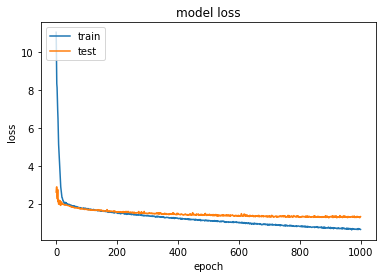

In [103]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [104]:
    import tensorflow as tf 

    if tf.test.gpu_device_name(): 

        print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

    else:

       print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


2022-03-04 21:12:13.846315: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /device:GPU:0 with 3013 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1
2022-03-04 21:12:13.849974: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /device:GPU:0 with 3013 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1
